In [4]:
from packages.Utility.Gabor import GaborFilterBanks
import matplotlib.pyplot as plt
import numpy as np

In [5]:
class GaborParams():
    
    def getParams(self, shape, i, j):
        multiplier = 360 / shape[3]
        degree = multiplier * i
        
        lambd = 0.5
        theta = degree * np.pi / 180
        psi = 1.57
        sigma = 2
        gamma = 0.75
        
        return lambd, theta, psi, sigma, gamma

In [6]:
shape = (11, 11, 3, 16)

banks = GaborFilterBanks(GaborParams())
filters = banks.getFilterBanks(shape)

0.0
22.5
45.0
67.5
90.0
112.5
135.0
157.5
180.0
202.5
225.0
247.5
270.0
292.5
315.0
337.5


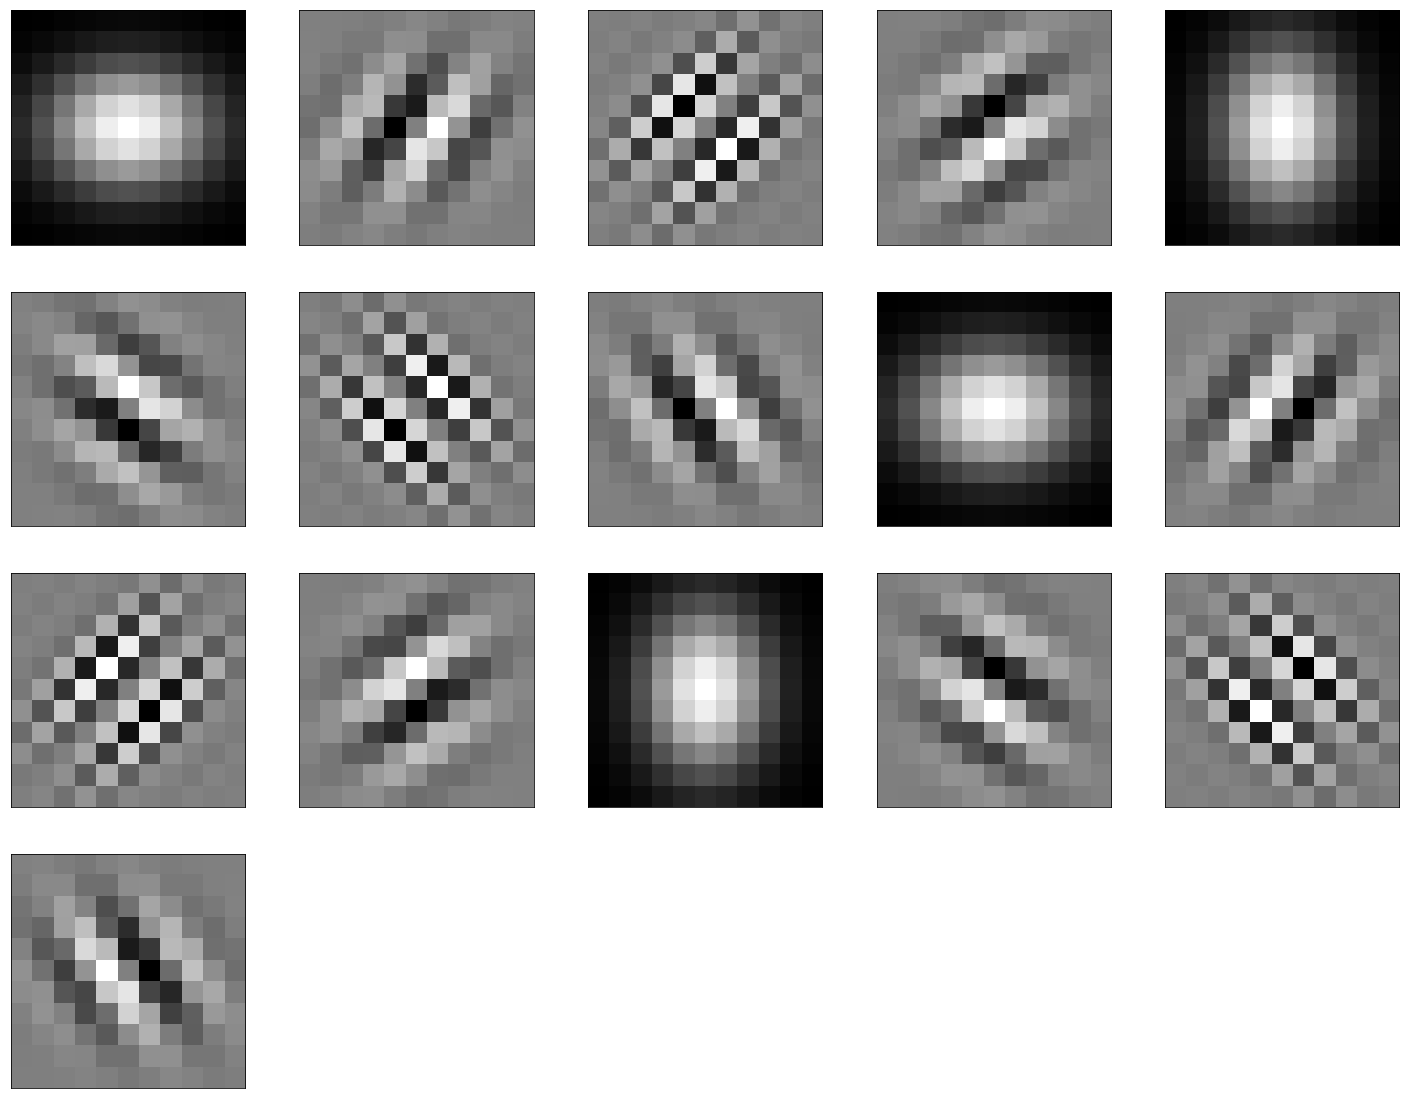

In [7]:
fig = plt.figure(figsize = (25, 25))

for i in range(shape[3]):
    y = plt.subplot(5, 5, i + 1)
    y.imshow(filters[:, :, 0, i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()